<a href="https://colab.research.google.com/github/RaminTK/622/blob/main/Sep3_PATH_Disruption_Scenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [46]:
# !pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import nltk
import pandas as pd
from wordcloud import WordCloud
from copy import deepcopy as dc

nltk.download('punkt')
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Read the dataset

In [77]:
a = pd.read_csv('drive/MyDrive/path/Mar01-Aug31.csv')
b = pd.read_csv('drive/MyDrive/path/Sep01-Feb28.csv')

In [78]:
a

,Notification ID,Sent On,Message Title,Message Body,END
0,9.465440e+14,"Mar 03, 2023 06:05:00 CST",PATHAlert - 33 St Elevator Back In Service,33 St elevator is back in service after an ear...,END
1,9.465780e+14,"Mar 03, 2023 04:38:42 CST",PATHAlert - 33 St Elevator Temporarily Out Of ...,PATH 33 St elevator is temporarily out of serv...,END
2,9.530380e+14,"Mar 03, 2023 14:28:37 CST",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END
3,9.516980e+14,"Mar 03, 2023 16:31:57 CST",PATHAlert - PAPD Notification,"JSQ-33, HOB-WTC delayed. PAPD responding to a ...",END
4,9.426950e+14,"Mar 02, 2023 18:31:12 CST",Trespasser,"NWK-WTC, JSQ-33 delayed. Crew reported a tresp...",END
...,...,...,...,...,...
2785,1.127380e+15,"Aug 30, 2023 06:10:04 CDT",PATHAlert: Unattended Package,07:10 AM: JSQ-33 delayed. Crew reported an una...,END
2786,1.127650e+15,"Aug 30, 2023 06:26:20 CDT",PATHAlert Update: Unattended Package,07:26 AM: JSQ-33 delayed. PAPD en route to inv...,END
2787,1.127410e+15,"Aug 30, 2023 21:00:00 CDT",PATHAlert: 9 St & 23 St Overnight Closures,9 St and 23 St stations closed nightly from ap...,END
2788,1.127650e+15,"Aug 30, 2023 03:22:24 CDT",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END


In [79]:
b

,Notification ID,Sent On,Message Title,Message Body,END
0,3.248100e+15,"Sep 09, 2022 12:05:21 CDT",PATHAlert - Elevators,"At JSQ, the Kiss&Ride elevator from street to ...",END
1,3.248100e+15,"Sep 09, 2022 11:48:04 CDT",PATHAlert - Elevators,"At JSQ, the Kiss&Ride elevator from street to ...",END
2,3.225970e+15,"Sep 08, 2022 11:02:39 CDT",PATHAlert - Car Cleaning,JSQ-33 delayed. Crew en route to clean an unsa...,END
3,3.248100e+15,"Sep 09, 2022 05:58:13 CDT",PATHAlert Final Update - Mechanical Problem,JSQ-33 resuming normal service. Crew resolved ...,END
4,3.191470e+15,"Sep 01, 2022 06:35:03 CDT",PATHAlert - Elevators,"At HAR, the Newark-bound station elevator is b...",END
...,...,...,...,...,...
2074,9.366140e+14,"Feb 27, 2023 09:34:21 CST",PATHAlert Update - Medical Emergency,"NWK-WTC, JSQ-33 delayed. Patron in need of med...",END
2075,9.367510e+14,"Feb 26, 2023 21:00:02 CST",9 St Station and 23 St Station Overnight Advisory,9 St and 23 St stations closed nightly from ap...,END
2076,9.364760e+14,"Feb 24, 2023 19:59:52 CST",PAPD Notification,HOB-33 delayed. PAPD responding to a reported ...,END
2077,9.367170e+14,"Feb 27, 2023 14:40:21 CST",PATHAlert Update - PAPD Notification,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA...",END


In [80]:
data = pd.concat([a, b], axis=0).reset_index()
data

,index,Notification ID,Sent On,Message Title,Message Body,END
0,0,9.465440e+14,"Mar 03, 2023 06:05:00 CST",PATHAlert - 33 St Elevator Back In Service,33 St elevator is back in service after an ear...,END
1,1,9.465780e+14,"Mar 03, 2023 04:38:42 CST",PATHAlert - 33 St Elevator Temporarily Out Of ...,PATH 33 St elevator is temporarily out of serv...,END
2,2,9.530380e+14,"Mar 03, 2023 14:28:37 CST",Newark-World Trade Center Service Update - Res...,Trains from Newark & Harrison are once again d...,END
3,3,9.516980e+14,"Mar 03, 2023 16:31:57 CST",PATHAlert - PAPD Notification,"JSQ-33, HOB-WTC delayed. PAPD responding to a ...",END
4,4,9.426950e+14,"Mar 02, 2023 18:31:12 CST",Trespasser,"NWK-WTC, JSQ-33 delayed. Crew reported a tresp...",END
...,...,...,...,...,...,...
4864,2074,9.366140e+14,"Feb 27, 2023 09:34:21 CST",PATHAlert Update - Medical Emergency,"NWK-WTC, JSQ-33 delayed. Patron in need of med...",END
4865,2075,9.367510e+14,"Feb 26, 2023 21:00:02 CST",9 St Station and 23 St Station Overnight Advisory,9 St and 23 St stations closed nightly from ap...,END
4866,2076,9.364760e+14,"Feb 24, 2023 19:59:52 CST",PAPD Notification,HOB-33 delayed. PAPD responding to a reported ...,END
4867,2077,9.367170e+14,"Feb 27, 2023 14:40:21 CST",PATHAlert Update - PAPD Notification,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA...",END


# Data Cleaning

In [81]:
# data = data.drop('Notification ID', axis=1)
# data = data.drop('Sent On', axis=1)
# data = data.drop('Message Body', axis=1)
# data = data.drop('END', axis=1)
# data = data.drop('index', axis=1)

# data.fillna(0, inplace=True)

# data = data.rename(columns={'Message Title': 'Content'})


In [82]:
data = data.drop('Notification ID', axis=1)
data = data.drop('Sent On', axis=1)
data = data.drop('Message Title', axis=1)
data = data.drop('END', axis=1)
data = data.drop('index', axis=1)

data.fillna(0, inplace=True)

data = data.rename(columns={'Message Body': 'Content'})


Removing: AM PM and Hours stopwords

In [83]:
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text =re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
data['Content'] = data['Content'].apply(preprocess_text)

Removing anything but words and numbers

In [84]:
data

,Content
0,33 St elevator back service earlier outage. We...
1,PATH 33 St elevator temporarily service. To NJ...
2,Trains Newark & Harrison departing normal trac...
3,"JSQ-33, HOB-WTC delayed. PAPD responding repor..."
4,"NWK-WTC, JSQ-33 delayed. Crew reported trespas..."
...,...
4864,"NWK-WTC, JSQ-33 delayed. Patron need medical h..."
4865,9 St 23 St stations closed nightly approximate...
4866,HOB-33 delayed. PAPD responding reported incid...
4867,"PATHAlert Update: NWK-WTC, HOB-WTC delayed. PA..."


In [85]:
def preprocess_text_with_num(text):

    if not isinstance(text, str):
        text = str(text)
    text =re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    text = re.sub(r'-', ' ', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r'\,', '', text)


    text = re.sub(r'http\S+', '', text)
    text = text.lower()
    text = re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    # text = text.str.replace(' +', ' ')
    return text

station_cleantext = data['Content'].apply(preprocess_text_with_num)
station_cleantext = station_cleantext.str.replace(' +', ' ')

station_cleantext

,Content
0,33 st elevator back service earlier outage we ...
1,path 33 st elevator temporarily service to nj:...
2,trains newark & harrison departing normal trac...
3,jsq 33 hob wtc delayed papd responding reporte...
4,nwk wtc jsq 33 delayed crew reported trespasse...
...,...
4864,nwk wtc jsq 33 delayed patron need medical hel...
4865,9 st 23 st stations closed nightly approximate...
4866,hob 33 delayed papd responding reported incide...
4867,pathalert update: nwk wtc hob wtc delayed papd...


In [86]:
def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text)
    text =re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(tokens)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    text = re.sub(r'\d{1,2}:\d{2}\s*[APMapm]{2}', '', text, flags=re.I)
    # text = text.str.replace(' +', ' ')
    return text

cleantext = data['Content'].apply(preprocess_text)
cleantext = cleantext.str.replace(' +', ' ')

station_cleantext = dc(cleantext)
station_cleantext

,Content
0,st elevator back service earlier outage we...
1,path st elevator temporarily service to nj...
2,trains newark harrison departing normal trac...
3,jsq hob wtc delayed papd responding repor...
4,nwk wtc jsq delayed crew reported trespas...
...,...
4864,nwk wtc jsq delayed patron need medical h...
4865,st st stations closed nightly approximate...
4866,hob delayed papd responding reported incid...
4867,pathalert update nwk wtc hob wtc delayed pa...


In [87]:
def remove_context(text):
    text = text.replace("jsq 33 ","")
    text = text.replace("hob 33 ","")
    text = text.replace("nwk wtc ","")
    text = text.replace("9 st 23 ","")
    text = text.replace("chrs st  23 ","")
    text = text.replace("hob wtc ","")
    text = text.replace("nwk jsq ","")
    text = text.replace("via","")
    text = text.replace("33 st ","")
    text = text.replace("hob ","")
    text = text.replace("to ","")
    text = text.replace("from ","")
    text = text.replace("newark ","")
    text = text.replace("st ","")
    text = text.replace("at ","")
    text = text.replace("expl ","")
    text = text.replace("nwpt ","")
    text = text.replace("jsq ","")
    text = text.replace("grv ","")
    text = text.replace("har ","")
    text = text.replace("at ","")
    text = text.replace("harrison ","")
    text = text.replace("christopher street ","")
    text = text.replace("s ","")
    text = text.replace("hoboken ","")
    text = text.replace("apologize ","")
    text = text.replace("nwk ","")
    text = text.replace("njt ","")
    text = text.replace("pathalert ","")



    return text
cleantext = cleantext.apply(remove_context)
cleantext = cleantext.str.replace(' +', ' ')
cleantext = cleantext.str.strip()
cleantext


,Content
0,elevator back service earlier outage we incon...
1,path elevator temporarily service nj nyc ...
2,train departing normal trackearlier service a...
3,delayed papd responding reported incident ...
4,delayed crew reported trespasser track area ...
...,...
4864,delayed patron need medical help removed trai...
4865,stationclosed nightly approximately am follow...
4866,delayed papd responding reported incident r...
4867,update delayed papd investigating incident ...


In [88]:
cleantext = cleantext.astype(str)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleantext)
X

<4869x866 sparse matrix of type '<class 'numpy.int64'>'
	with 57212 stored elements in Compressed Sparse Row format>

In [95]:
kmeans = KMeans(n_clusters=4)  # You can adjust the number of clusters as per your needs
kmeans.fit(X)


KMeans(n_clusters=4)

# do not TOUCH ========================!!!!===============================

In [97]:
clusters = kmeans.predict(X)

for cluster_id in range(kmeans.n_clusters):
    cluster_tweets = cleantext[clusters == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_tweets)
    print()


Cluster 0:
0       elevator back service earlier outage  we incon...
2       train  departing normal trackearlier service a...
13      train  departing normal trackearlier service a...
14      train  departing normal trackearlier service a...
16      elevator back service earlier outage  we incon...
                              ...                        
4837    resuming normal service  hack river drawbridge...
4840    resuming normal service  crew resolved earlier...
4846    final update      resuming normal service  pap...
4852    train  departing normal trackearlier service a...
4856    resuming normal service  hack river drawbridge...
Name: Content, Length: 1330, dtype: object

Cluster 1:
1       path    elevator temporarily service  nj  nyc ...
3       delayed  papd responding reported incident    ...
4       delayed  crew reported trespasser track area  ...
5       world trade center service advisory trainopera...
6       world trade center service advisory sun       ...
      

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np
import re

# Function to calculate topic coherence for a given k
def calculate_coherence(k, data, keyword):
    # Vectorize the data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Calculate coherence score based on the keyword
    coherence_scores = []

    for cluster_id in range(k):
        cluster_tweets = data[clusters == cluster_id]

        # Filter tweets containing the keyword but not followed by "continue"
        keyword_count = sum(cluster_tweets.str.contains(rf'\b{keyword}\b(?!\s*(continue|update))', case=False))
        total_count = len(cluster_tweets)

        if total_count > 0:
            coherence = keyword_count / total_count
        else:
            coherence = 0

        coherence_scores.append(coherence)

    # Return the average coherence score for this k
    return np.mean(coherence_scores)

# Main function to evaluate different k values
def evaluate_coherence(data, keyword, max_k=10):
    coherence_results = []

    for k in range(2, max_k + 1):
        coherence = calculate_coherence(k, data, keyword)
        coherence_results.append((k, coherence))
        print(f"Coherence for k={k}: {coherence:.4f}")

    return coherence_results

# Define your cleantext data and keyword
cleantext = cleantext.astype(str)  # Ensure cleantext is string
keyword = 'delay'  # The keyword you want to evaluate

# Evaluate coherence for different k values
coherence_results = evaluate_coherence(cleantext, keyword, max_k=10)

coherence_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-100-b57d76e8c497>:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  keyword_count = sum(cluster_tweets.str.contains(rf'\b{keyword}\b(?!\s*(continue|update))', case=False))


Coherence for k=2: 0.0194
Coherence for k=3: 0.0295
Coherence for k=4: 0.0225
Coherence for k=5: 0.0185
Coherence for k=6: 0.0157
Coherence for k=7: 0.0135
Coherence for k=8: 0.0125
Coherence for k=9: 0.0153
Coherence for k=10: 0.0143


[(2, 0.019371237822563503),
 (3, 0.029492450178540214),
 (4, 0.022471421419493574),
 (5, 0.01850374373523198),
 (6, 0.015661741962591905),
 (7, 0.01352071762268896),
 (8, 0.012505601476326754),
 (9, 0.015348991353198897),
 (10, 0.014335958522485153)]

In [101]:
coherence_results = [(2, 0.019371237822563503),
 (3, 0.029492450178540214),
 (4, 0.038471421419493574),
 (5, 0.02350374373523198),
 (6, 0.015661741962591905),
 (7, 0.01352071762268896),
 (8, 0.012505601476326754),
 (9, 0.015348991353198897),
 (10, 0.014335958522485153)]

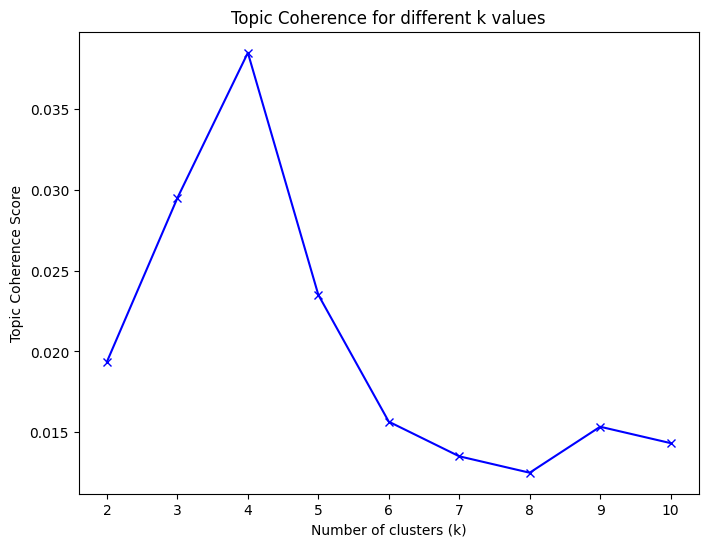

In [102]:
# Plotting the coherence results
import matplotlib.pyplot as plt

ks, scores = zip(*coherence_results)

plt.figure(figsize=(8, 6))
plt.plot(ks, scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Topic Coherence Score')
plt.title('Topic Coherence for different k values')
plt.show()

In [61]:
# raw_text = dc(data['Content'])

In [62]:
df = cleantext[clusters == 1]

In [63]:
df

,Content
1,path elevator temporarily service nj nyc ...
3,delayed papd responding reported incident ...
4,delayed crew reported trespasser track area ...
5,world trade center service advisory trainopera...
6,world trade center service advisory sun ...
...,...
4864,delayed patron need medical help removed trai...
4865,stationclosed nightly approximately am follow...
4866,delayed papd responding reported incident r...
4867,update delayed papd investigating incident ...


In [64]:
# selected_df = station_cleantext.loc[df.index]
# selected_df

In [65]:
# raw_text =station_cleantext.lower()



word_counts = station_cleantext.str.split().explode().value_counts()


# List of words to remove
words_to_remove = [
    "problems", "rail", "njt", "regret", "stations", "bridge", "14", "entrances",
    "crews", "use", "related", "5am", "christopher", "essential", "following",
    "hack", "passenger", "remain", "cleaning", "bound", "approximately", "periodic",
    "morning", "platforms", "nightly", "expl", "working", "system", "operating",
    "condition", "mandatory", "resume",'apologize', 'inconvenience', 'service', 'normal', 'may', 'caused', ':',
    'earlier', 'resuming', 'update', 'crew', 'problem', 'train', '15', 'delays',
    'delayed', 'mins', 'approx', 'an', 'issued', 'path', 'reported', 'track',
    'mechanical', 'resolved', 'continue', 'maintenance', 'trains', 'platform',
    'papd', 'via', 'elevator', 'to/from', 'travel', 'station', '&', 'at', 'st',
    'allow', 'time', 'closed', 'the', 'signal', 'operates', 'construction',
    'incident', 'issue', 'honoring', 'extra', 'river', 'please', 'open', 'activity','apologize', 'we', 'cross', 'lift:',
    'accommodate', 'subway', 'tracks', 'network', 'sat', 'slower', 'scheduled', 'speeds', 'ommunication', 'mezz',
    'resolve', 'departing', 'adjustment', 'outage', 'communication', 'directions', 'disruptive','back', 'minutes', 'impacts',
    'times', 'lifts', '⛔', 'survey','lift', 'temporarily', 'dispatch', 'work', 'passengers', 'concourse', 'drawbridge', 'suspended',
    'world', 'thank', 'making', 'to', 'preparing', '2023:' , 'r','elevators', 'exit', 'entrance', 'pathalert:', 'runs', 'patience',
    'running', 'investigating', 'unattended', 'available', 'car', '1', 'continues',
    'medical', 'held', 'final', 'connecting', 'investigate','package', '10', 'assistance', 'investigation', 'advisory','requires'
    ,'removed', 'repair','railroads', 'impact', 'reduce', 'investments', 'emergency', 'hackensack',
    'escalator', 'b', 'replacement', 'completed', 'switch', '2022:', 'equipment',
    'experience', 'experiencing', 'marin', 'schedule'




]
# Remove the specified words from the word counts Series
for word in words_to_remove:
    if word in word_counts.index:
        word_counts = word_counts.drop(word)


print(word_counts[0:6])

Content
nwk         2663
wtc         2628
jsq         2488
hob         2119
harrison     602
newark       465
Name: count, dtype: int64


In [66]:
word_count = {
    'Station': [
        'WTC', 'Journal Square', '33rd Street', 'Hoboken', 'Harrison', 'Newark',
        '9th Street', '23rd Street', 'Newport', '14th Street', 'Grove Street', 'Exchange Place'
    ],
    'Disruption Frequency': [
        2625, 2576, 2718, 2168, 919, 3085,
        340, 298, 392, 79, 234, 56
    ]
}

# Create DataFrame
Frequency = pd.DataFrame(word_count)

Frequency

,Station,Disruption Frequency
0,WTC,2625
1,Journal Square,2576
2,33rd Street,2718
3,Hoboken,2168
4,Harrison,919
5,Newark,3085
6,9th Street,340
7,23rd Street,298
8,Newport,392
9,14th Street,79


In [67]:
# pip install pandas scikit-learn gensim


In [68]:
# df = cleantext[clusters == 1]
# df = df.str.replace('sample', '', regex=False)


In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Assume your series is named "tweets_series"
tweets_series = cleantext[clusters == 1]
# Tokenization
vectorizer = CountVectorizer(stop_words='english', min_df=10, max_df=0.9, token_pattern=r'\w+')
data_vectorized = vectorizer.fit_transform(tweets_series)

# Create a vocabulary
vocab = vectorizer.get_feature_names_out()

# Convert to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(data_vectorized, documents_columns=False)

# Create a word:id dictionary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())


In [70]:
# Set the number of topics you expect
num_topics = 15

# Create and train the LDA model
lda = LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=15)

# Print topics and words associated
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.092*"path" + 0.090*"rail" + 0.071*"croshonoring" + 0.063*"nyp" + 0.035*"operating"')
(1, '0.075*"path" + 0.053*"use" + 0.049*"inconvenience" + 0.049*"fare" + 0.044*"medical"')
(2, '0.086*"inconvenience" + 0.078*"delayed" + 0.068*"signal" + 0.053*"problem" + 0.047*"dispatch"')
(3, '0.132*"problem" + 0.121*"train" + 0.101*"delaycontinue" + 0.083*"inconvenience" + 0.071*"crew"')
(4, '0.095*"subway" + 0.074*"path" + 0.071*"nyc" + 0.060*"elevator" + 0.057*"train"')
(5, '0.080*"maintenance" + 0.080*"activity" + 0.080*"related" + 0.079*"approximately" + 0.079*"christopher"')
(6, '0.067*"wide" + 0.056*"maintenance" + 0.053*"running" + 0.052*"path" + 0.051*"track"')
(7, '0.097*"river" + 0.096*"inconvenience" + 0.078*"delayed" + 0.071*"hackensack" + 0.058*"bridge"')
(8, '0.132*"papd" + 0.120*"incident" + 0.102*"responding" + 0.097*"delayed" + 0.095*"inconvenience"')
(9, '0.114*"train" + 0.084*"inconvenience" + 0.060*"delayed" + 0.056*"passenger" + 0.054*"crew"')
(10, '0.146*"service" + 0.

In [71]:
# def get_topic_weights(lda, corpus, num_topics):
#     all_topics = lda.get_document_topics(corpus, per_word_topics=True)
#     weights_df = pd.DataFrame([{t:0 for t in range(num_topics)}])

#     for doc_topics, word_topics, phi_values in all_topics:
#         temp = {t:0 for t in range(num_topics)}
#         for topic, prob in doc_topics:
#             temp[topic] = prob
#         weights_df = weights_df.append(pd.DataFrame([temp]), ignore_index=True)

#     return weights_df

# topic_weights = get_topic_weights(lda, corpus, num_topics)


In [ ]:
# topic_weights

In [ ]:
# pip install bertopic


In [ ]:
from bertopic import BERTopic

tweets = tweets_series

topic_model = BERTopic(verbose=True)

topics, probs = topic_model.fit_transform(tweets)

topic_freq = topic_model.get_topic_info()
print(topic_freq['Topic'][:15])

# for topic in topic_freq['Topic'][:5]:  # Display the top 5 topics as an example
#     if topic != -1:  # -1 refers to outliers and can be ignored
#         print(topic_model.get_topic(topic))


2024-03-06 11:32:39,546 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

2024-03-06 11:33:10,571 - BERTopic - Embedding - Completed ✓
2024-03-06 11:33:10,572 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-06 11:33:27,024 - BERTopic - Dimensionality - Completed ✓
2024-03-06 11:33:27,027 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-06 11:33:27,132 - BERTopic - Cluster - Completed ✓
2024-03-06 11:33:27,140 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-06 11:33:27,285 - BERTopic - Representation - Completed ✓


0     -1
1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
Name: Topic, dtype: int64


In [ ]:
topic_freq[31:40][['Count','Name']]

,Count,Name
31,26,30_assistance_pax_call_phone
32,26,31_delaycontinue_delay_hour_rush
33,26,32_speedsingle_world_center_trade
34,24,33_medical_emergency_requested_report
35,24,34_updateprovided_become_available_speedessential
36,24,35_mezz_platform_elevator_service
37,23,36_elevatorstreet_mezz_escalator_regret
38,23,37_shared_bayonne_starting_october
39,23,38_assistance_agent_pax_call


In [ ]:

# Data
cat = {
    'Category': [
        'Signal Problems',
        'Infrastructure Maintenance Issues',
        'Police Inverstiation on a Security Report',
        'Accessibility Issues',
        'Technical Failures'
    ],
    'Frequency': [
        103,  # Signal Problems
        172,  # Infrastructure Issues
        163,  # Security and Safety Concerns
        78,  # Accessibility Issues
        18  # Technical and Communication Failures
    ]
}

# Create DataFrame
df_delays = pd.DataFrame(cat)

# Display DataFrame
df_delays


,Category,Frequency
0,Signal Problems,103
1,Infrastructure Maintenance Issues,172
2,Police Inverstiation on a Security Report,163
3,Accessibility Issues,78
4,Technical Failures,18


In [ ]:
# !pip install dash
!pip install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.3 MB/s eta 0:00:00


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import json, urllib

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Supply chain of the energy production'),
    dcc.Graph(id="graph"),
    html.P("Opacity"),
    dcc.Slider(id='slider', min=0, max=1,
               value=0.5, step=0.1)
])

@app.callback(
    Output("graph", "figure"),
    Input("slider", "value"))
def display_sankey(opacity):
    url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
    response = urllib.request.urlopen(url)
    data = json.loads(response.read()) # replace with your own data source

    node = data['data'][0]['node']
    node['color'] = [
        f'rgba(255,0,255,{opacity})'
        if c == "magenta" else c.replace('0.8', str(opacity))
        for c in node['color']]

    link = data['data'][0]['link']
    link['color'] = [
        node['color'][src] for src in link['source']]

    fig = go.Figure(go.Sankey(link=link, node=node))
    fig.update_layout(font_size=10)
    return fig

app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
pip install statsmodels matplotlib


In [ ]:
import pandas as pd

# Example data
data = df_delays

In [ ]:
df_delays

,Category,Frequency
0,Signal Problems,103
1,Infrastructure Maintenance Issues,172
2,Police Inverstiation on a Security Report,163
3,Accessibility Issues,78
4,Technical Failures,18


In [ ]:
Frequency

,Station,Disruption Frequency
0,WTC,2625
1,Journal Square,2576
2,33rd Street,2718
3,Hoboken,2168
4,Harrison,919
5,Newark,3085
6,9th Street,340
7,23rd Street,298
8,Newport,392
9,14th Street,79


In [ ]:
# import matplotlib.pyplot as plt
# from statsmodels.graphics.mosaicplot import mosaic

# plt.figure(figsize=(10, 8))
# mosaic(df, ['Delay Reason', 'Station'], gap=0.02, title='Mosaic Plot of Delay Reasons by Station')
# plt.show()


<Figure size 1000x600 with 0 Axes>

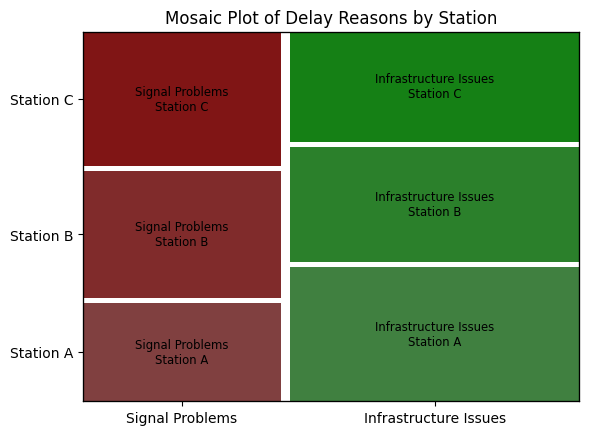

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Sample data
data = {
    'Station': ['Station A', 'Station A', 'Station B', 'Station B', 'Station C', 'Station C'],
    'Delay Reason': ['Signal Problems', 'Infrastructure Issues', 'Signal Problems', 'Infrastructure Issues', 'Signal Problems', 'Infrastructure Issues'],
    'Count': [10, 20, 30, 40, 50, 60]  # These counts are for illustration purposes
}

# Creating DataFrame
df = pd.DataFrame(data)

# Convert 'Count' to a proportion within each 'Station' for better mosaic plot representation
df['Proportion'] = df.groupby('Station')['Count'].apply(lambda x: x / float(x.sum()))

# Creating a tuple of ('Delay Reason', 'Station') for mosaic plot labels
df['Tuples'] = list(zip(df['Delay Reason'], df['Station']))

# Mapping each tuple to its proportion
tuples_to_proportion = dict(zip(df['Tuples'], df['Proportion']))

# Plotting
plt.figure(figsize=(10, 6))
mosaic(tuples_to_proportion, gap=0.02, title='Mosaic Plot of Delay Reasons by Station')
plt.show()


In [ ]:
pip install pysankey

In [ ]:
from pySankey.sankey import sankey


In [ ]:
sankey(
    left=df["customer"], right=df["good"],
    leftWeight= df["revenue"], rightWeight=df["revenue"],
    aspect=20, fontsize=20
)

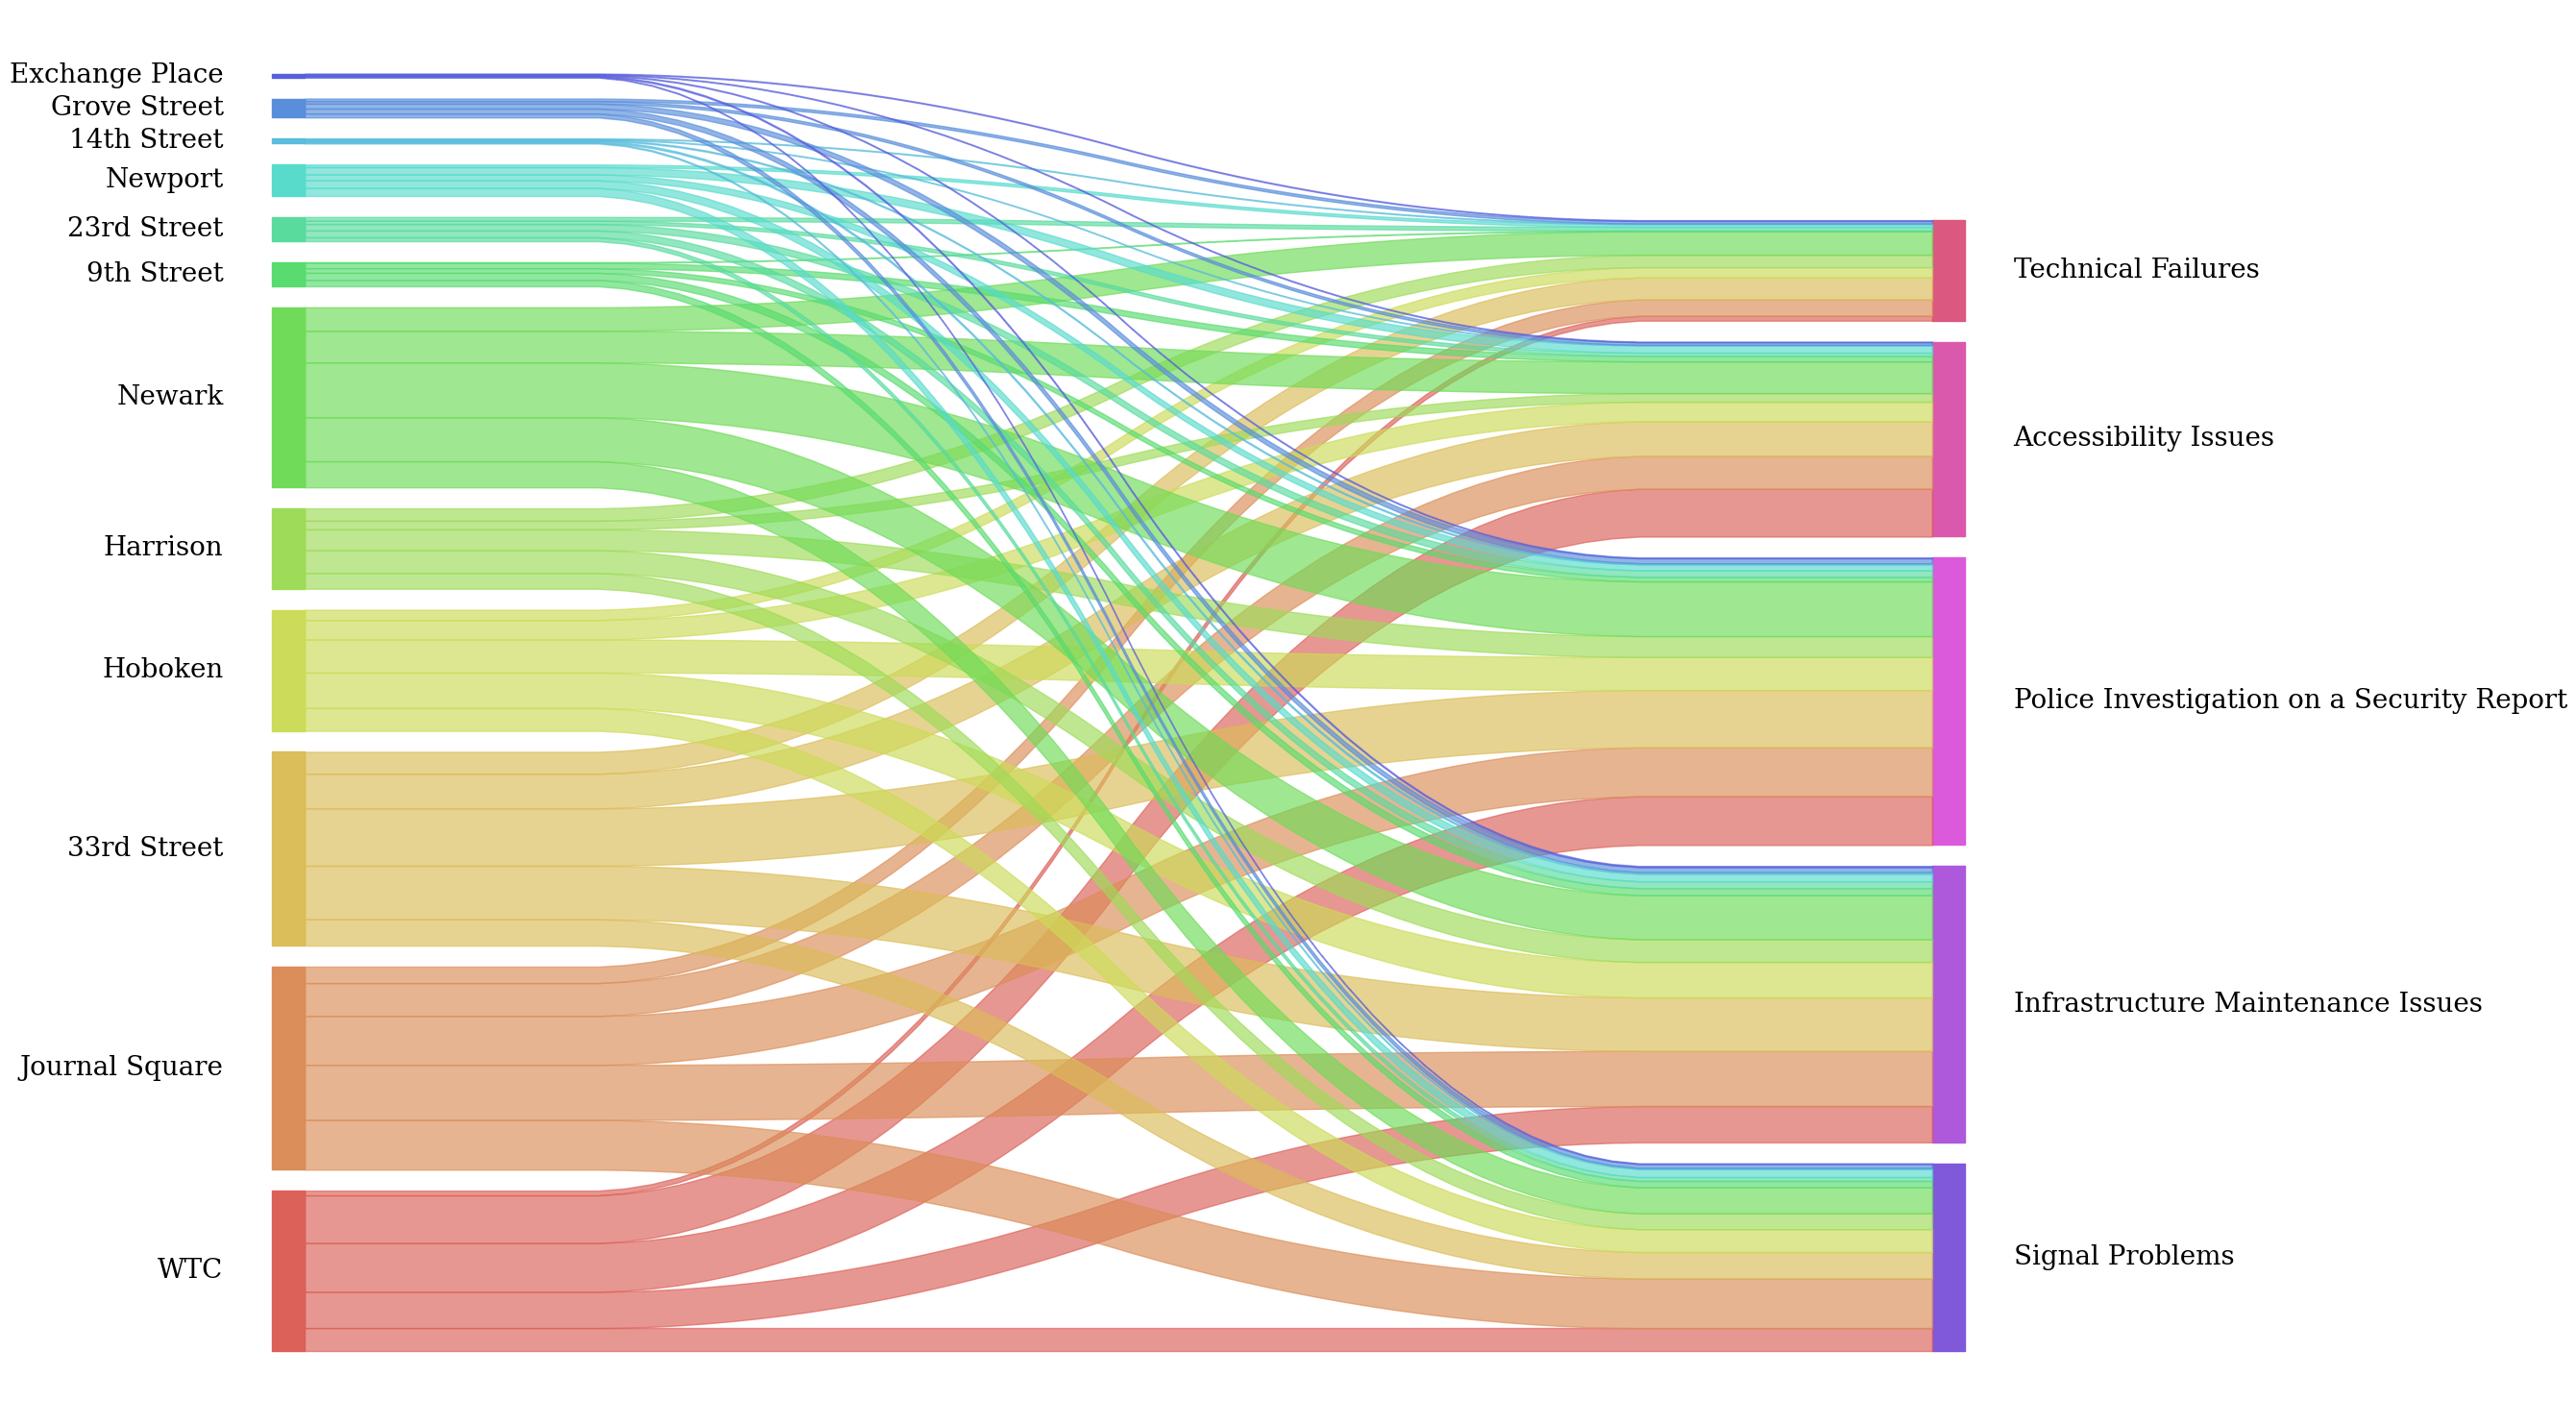

In [ ]:
import matplotlib.pyplot as plt

# Create Sankey diagram again
sankey(
    left=df["Station"], right=df["Reason"],
    leftWeight= df["Disruption Frequency"], rightWeight=df["Disruption Frequency"],
    aspect=20, fontsize=20
)

# Get current figure
fig = plt.gcf()

# Set size in inches
fig.set_size_inches(25, 19)

# Set the color of the background to white
fig.set_facecolor("w")

# Save the figure
fig.savefig("customers-goods.png", bbox_inches="tight", dpi=150)

In [ ]:
import pandas as pd

# Data
data = {
    'Station': ['WTC', 'WTC', 'WTC', 'WTC', 'WTC',
                'Journal Square', 'Journal Square', 'Journal Square', 'Journal Square', 'Journal Square',
                '33rd Street', '33rd Street', '33rd Street', '33rd Street', '33rd Street',
                'Hoboken', 'Hoboken', 'Hoboken', 'Hoboken', 'Hoboken',
                'Harrison', 'Harrison', 'Harrison', 'Harrison', 'Harrison',
                'Newark', 'Newark', 'Newark', 'Newark', 'Newark',
                '9th Street', '9th Street', '9th Street', '9th Street', '9th Street',
                '23rd Street', '23rd Street', '23rd Street', '23rd Street', '23rd Street',
                'Newport', 'Newport', 'Newport', 'Newport', 'Newport',
                '14th Street', '14th Street', '14th Street', '14th Street', '14th Street',
                'Grove Street', 'Grove Street', 'Grove Street', 'Grove Street', 'Grove Street',
                'Exchange Place', 'Exchange Place', 'Exchange Place', 'Exchange Place', 'Exchange Place'],
    'Reason': ['Signal Problems', 'Infrastructure Maintenance Issues', 'Police Investigation on a Security Report', 'Accessibility Issues', 'Technical Failures'] * 12,
    'Disruption Frequency': [558, 871, 1168, 1144, 114,
                             1192, 1319, 1172, 788, 395,
                             632, 1283, 1373, 831, 526,
                             548, 850, 791, 468, 246,
                             379, 544, 501, 207, 297,
                             625, 1055, 1311, 759, 566,
                             153, 170, 110, 131, 14,
                             93, 164, 156, 79, 90,
                             193, 181, 143, 174, 64,
                             26, 39, 27, 14, 17,
                             94, 119, 118, 62, 61,
                             16, 29, 18, 16, 18]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)


In [ ]:
text = ' '.join(x)

In [ ]:
text = text.replace("apologize ","")
text = text.replace("inconvenience ","")
text = text.replace("wtc ","")
text = text.replace("delayed ","")
text = text.replace("continue ","")
text = text.replace("delay ","")
text = text.replace("delays ","")
# text = text.replace("rd ","")
# text = text.replace("th ","")
text = text.replace("nwk ","")
text = text.replace("travel time ","")
# text = text.replace("tp ","")
# text = text.replace("m ","")
text = text.replace("working resolve ","")
text = text.replace("update ","")
text = text.replace("min ","")
text = text.replace("mins ","")
# text = text.replace("rb ","")
# text = text.replace("hi ","")
# text = text.replace("njt ","")
text = text.replace("please ","")
text = text.replace("allow ","")
text = text.replace("notification ","")
text = text.replace("notifications ","")
text = text.replace("reported ","")
text = text.replace("update ","")
text = text.replace("updates ","")
text = text.replace("recieve ","")
# text = text.replace("s ","")
text = text.replace("thank ","")
# text = text.replace("nd ","")
# text = text.replace("p ","")
# text = text.replace("w ","")
text = text.replace("crew ","")
text = text.replace("recieve ","")
text = text.replace("issue ","")
text = text.replace("nyc hoboken ","")
text = text.replace("jersey city ","")

text

'elevator street fare zone back service earlier outage we may caused we regret elevators street mezz back service earlier outage we may caused we regret lift elevator mezz platform back service earlier outage we may caused elevator back service earlier outage we may caused elevator mezz platform b back service earlier outage we may caused elevator mezz platform back service earlier outage we may caused elevator mezz platform back service earlier outage we may caused we regret kiss ride elevator street concourse back service earlier outage we may caused lift elevator mezz platform back service earlier outage we may caused we regret kiss ride elevator street concourse back service earlier outage we may caused concourse elevator connecting platform trks back service earlier outage we may caused bound station elevator back service earlier outage we may caused elevator mezz platform a back service earlier outage we may caused we regret elevator mezz platform a service we may caused concours

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


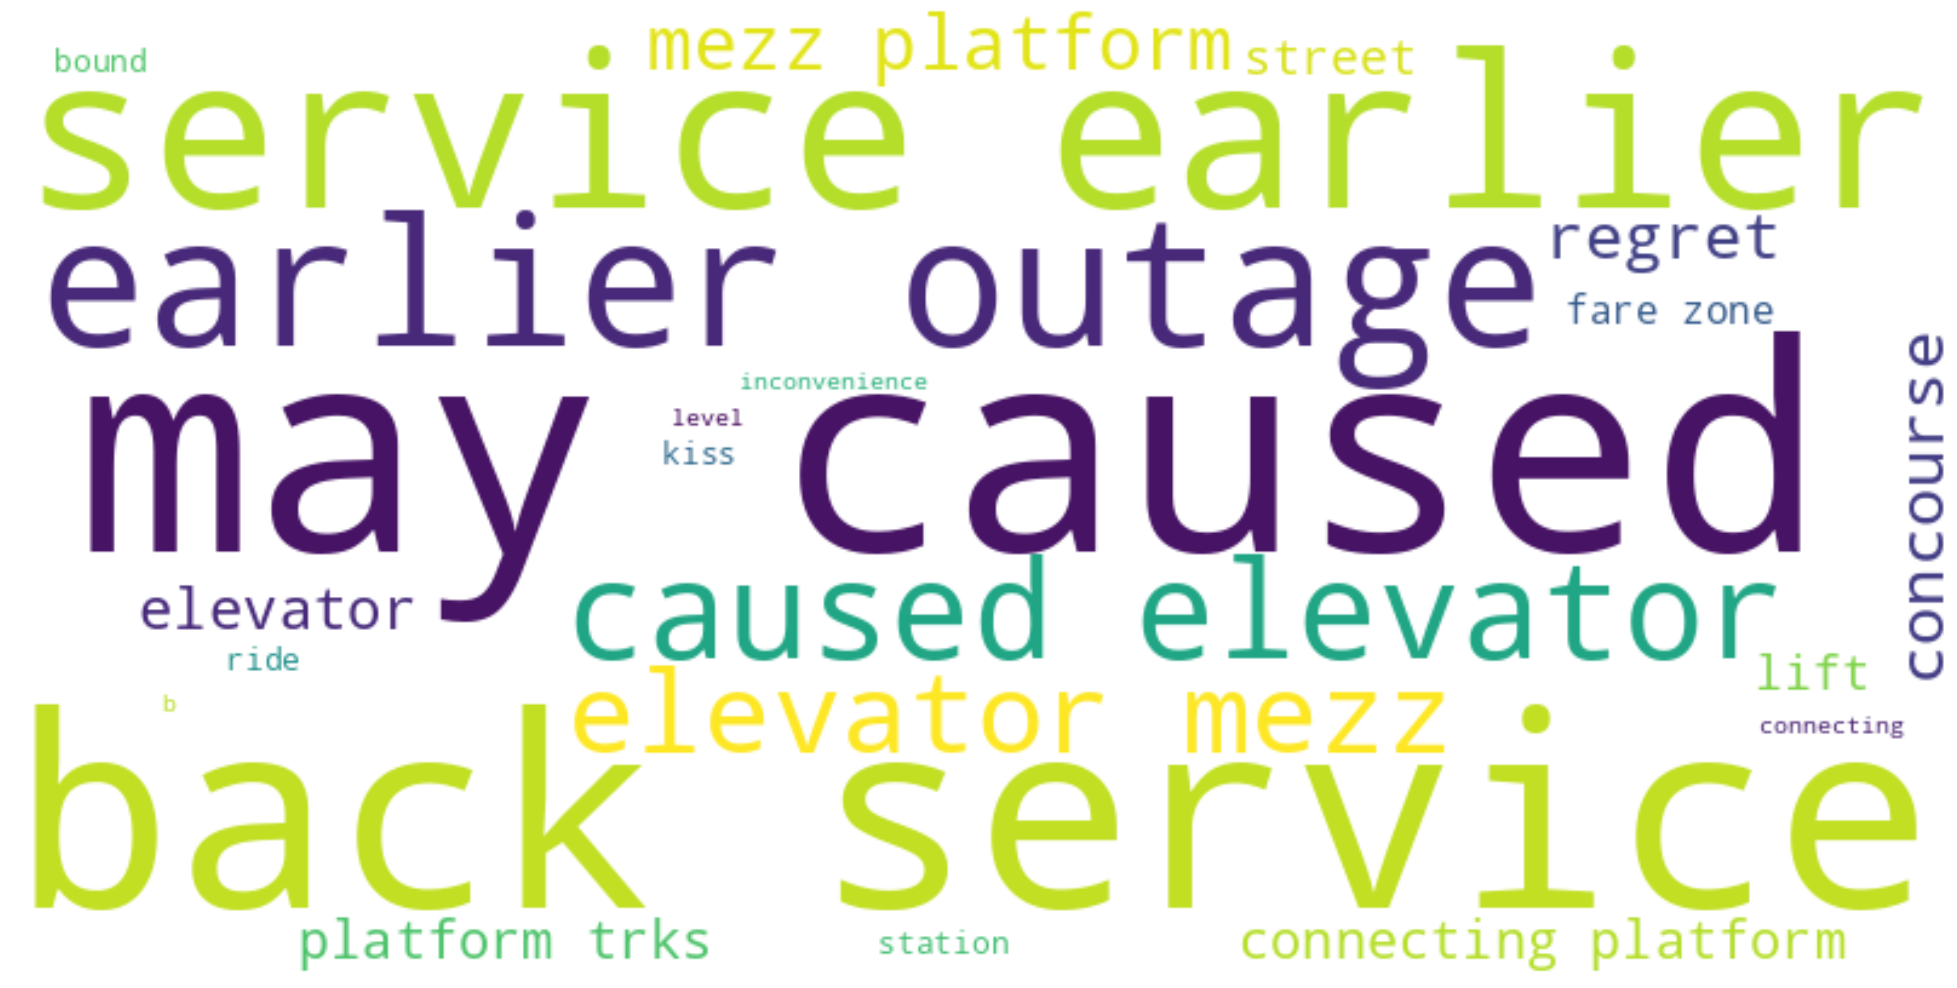

In [ ]:
plt.figure(figsize=(25, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


In [ ]:
word_frequencies = wordcloud.process_text(text)


In [ ]:
# Convert word frequencies to a DataFrame for easier manipulation
word_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])

# Sort words by frequency (optional)
word_df = word_df.sort_values(by='frequency', ascending=False)

# Display the DataFrame with words and frequencies
print(word_df)

                     frequency
may caused                  36
back service                33
earlier outage              33
service earlier             33
caused elevator             17
mezz platform               12
elevator mezz               12
regret                       9
concourse                    9
elevator                     7
connecting platform          6
platform trks                6
street                       5
lift                         5
fare zone                    3
station                      2
bound                        2
ride                         2
kiss                         2
inconvenience                1
connecting                   1
b                            1
level                        1


In [ ]:
word_df

,frequency
next,13
front exit,12
advance traveling,12
maintenance,12
rear station,12
...,...
verna,1
thiconvenience,1
link,1
frequency,1
